This Jupyter Notebook will be mainly used for the capstone project from IBM Data Science Professional Coursera Certificate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [3]:
!wget DataCollision.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-09 11:03:40--  http://datacollision.csv/
Resolving datacollision.csv (datacollision.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘datacollision.csv’
--2020-09-09 11:03:40--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv.1’

100%[======================================>] 73,917,638  44.9MB/s   in 1.6s   

2020-09-09 11:03:42 (44.9 MB/s) - ‘Data-Collisions.csv.1’ saved [73917638/73917638]

FINISHED --2020-09-09 11:03:42--
Total wall clock time: 1.9s
Downloaded: 1 files, 70M in 1.6s (44.9 MB/s)


In [4]:
initialData = pd.read_csv('Data-Collisions.csv')
df = initialData

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
from scipy.stats import chisquare
def corrCategorical(data):
    df=data.apply(lambda x : pd.factorize(x)[0])+1
    pd.DataFrame([chisquare(df[x].values,f_exp=df.values.T,axis=1)[0] for x in df]);
    return df.corr()

In [7]:
corr = corrCategorical(df)
corr['SEVERITYCODE'][np.abs(corr['SEVERITYCODE'])>0.056]

/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/stats.py:4653: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/stats.py:4653: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


SEVERITYCODE      1.000000
X                 0.067429
Y                 0.067592
ADDRTYPE          0.172032
INTKEY           -0.124089
LOCATION          0.067601
EXCEPTRSNDESC     0.078302
SEVERITYCODE.1    1.000000
SEVERITYDESC      1.000000
COLLISIONTYPE    -0.211465
PERSONCOUNT      -0.112706
PEDCOUNT         -0.246338
PEDCYLCOUNT      -0.214218
VEHCOUNT         -0.181422
SDOT_COLCODE     -0.072647
SDOT_COLDESC     -0.072647
WEATHER           0.056842
ROADCOND          0.076572
LIGHTCOND         0.084048
PEDROWNOTGRNT    -0.206283
ST_COLDESC       -0.157668
SEGLANEKEY       -0.127947
CROSSWALKKEY     -0.148796
HITPARKEDCAR      0.101498
Name: SEVERITYCODE, dtype: float64

# Data Processing

We will process data saving the following features: 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL',  'SPEEDING' and 'INATTENTIONIND'

In [8]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [9]:
features = ['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SPEEDING','INATTENTIONIND', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', \
           'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'PEDROWNOTGRNT']
fandtarget = ['SEVERITYCODE', 'WEATHER','ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SPEEDING','INATTENTIONIND', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', \
           'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'PEDROWNOTGRNT']

categoricalVariables = ['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE']
binaryVariables = ['UNDERINFL', 'INATTENTIONIND', 'SPEEDING', 'PEDROWNOTGRNT']
df = df[fandtarget]
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SPEEDING,INATTENTIONIND,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,PEDROWNOTGRNT
0,2,Overcast,Wet,Daylight,N,NaN,NaN,Intersection,Angles,2,0,0,2,NaN
1,1,Raining,Wet,Dark - Street Lights On,0,NaN,NaN,Block,Sideswipe,2,0,0,2,NaN
2,1,Overcast,Dry,Daylight,0,NaN,NaN,Block,Parked Car,4,0,0,3,NaN
3,1,Clear,Dry,Daylight,N,NaN,NaN,Block,Other,3,0,0,3,NaN
4,2,Raining,Wet,Daylight,0,NaN,NaN,Intersection,Angles,2,0,0,2,NaN


In [10]:
for f in features:
    print(df[f].value_counts())

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, d

In [11]:
nan_values = sum(df.isnull().values)
nan_values

array([     0,   5081,   5012,   5170,   4884, 185340, 164868,   1926,
         4904,      0,      0,      0,      0, 190006])

In [12]:
for f in categoricalVariables:
    df[f].replace(to_replace = ['Unknown', 'Other'], \
                                value = [np.nan,np.nan], inplace = True)
sum(df.isnull().values)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array([     0,  21004,  20222,  18878,   4884, 185340, 164868,   1926,
         4904,      0,      0,      0,      0, 190006])

In [13]:
accidentsMotives = features[0:5]
accidentsMotives.append('PEDROWNOTGRNT')

In [14]:
#Drop values that dont have any explanation: nor weather, nor light/road conditions, nor speeding, influence of drugs/alochol,
# Inattention or pedestrian tight of way not granted

df.dropna(axis = 0, inplace = True, subset = accidentsMotives, how = 'all')
sum(df.isnull().values)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([     0,  16120,  15338,  13994,      0, 180456, 159984,   1819,
           21,      0,      0,      0,      0, 185122])

We can see that they are a lot pre-conditioning data to be done. First we will modify the last 3 features with 1: Yes, 0: No or Nan. 

In [15]:
for i in binaryVariables:
    df[i].replace(to_replace = ['Y', 'N', '1', '0'], value = [1,0,1,0], inplace = True)
    df[i].fillna(0, inplace = True)
    print(df[i].value_counts())    

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0    180668
1      9121
Name: UNDERINFL, dtype: int64
0    159984
1     29805
Name: INATTENTIONIND, dtype: int64
0    180456
1      9333
Name: SPEEDING, dtype: int64
0    185122
1      4667
Name: PEDROWNOTGRNT, dtype: int64


In [16]:
# We will do a function that modify the nan values on Dataframes and they become randomly other variables
from numpy import random
def modifynan_values(Data):
    prob = Data.value_counts()/sum(Data.value_counts())
    Values = Data.value_counts().keys()

    for i in range(0, Data.shape[0]):
        val = Data.values[i]
        if(type(val) == float and np.isnan(val)):
            randval = random.rand()
            accumuled_prob = 0
            for Value in Values:
                accumuled_prob = accumuled_prob + prob[Value]
                if(randval<=accumuled_prob):
                    val = Value
                    break
                
        Data.values[i] = val
    
    return Data
         

In [19]:
 df['COLLISIONTYPE'].replace(to_replace = ['Other'], value = [np.nan], inplace = True)

In [20]:
for f in features:
    modifynan_values(df[f])

sum(df.isnull().values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Road Condition

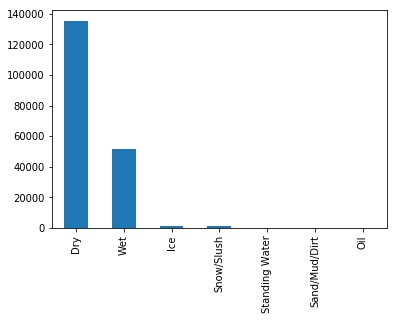

In [21]:
df['ROADCOND'].value_counts().plot(kind  = 'bar')
plt.show()

As you can see we dont have enought data on really bad conditions (ice, snow, ...). The best option here, in my opinion,  is consider ONLY two diferent variables:
 - $1$ for bad road conditions: Wet, Ice, Snow, Slush, etc...) 
 - $0$ for good road conditions: Dry
- For the Unknown and Other values, we will modify them, temporally,  to nan

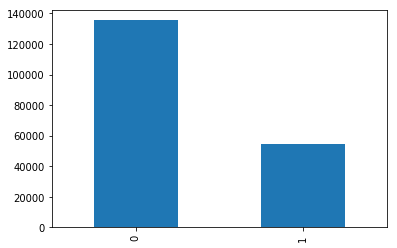

In [22]:
df['ROADCOND'].replace(to_replace = ['Dry', 'Wet', 'Ice', 'Snow/Slush', 'Standing Water','Sand/Mud/Dirt', 'Oil'], \
                                value = [0,1,1,1,1,1,1], inplace = True)
df['ROADCOND'].value_counts().plot(kind= 'bar')
plt.show()

# Light conditions

On a similar way we have done with the road conditions, we will modify the light conditions into several variables:
- 1: Bad light conditions (Night street light on and off)
- 0: Good light conditions (Daylight, Dawn, Dusk)
- nan: unknown and other values

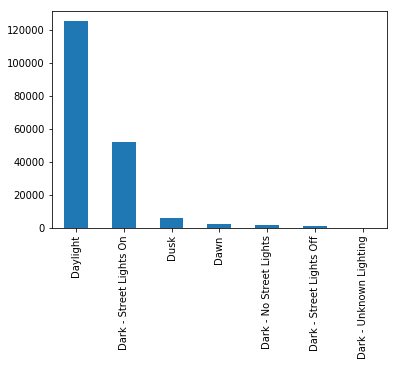

In [23]:
df['LIGHTCOND'].value_counts().plot(kind= 'bar')
plt.show()

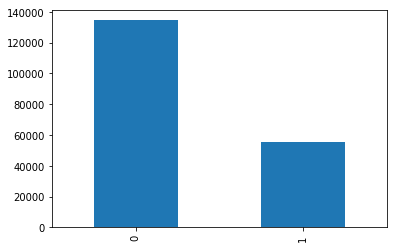

In [24]:
df['LIGHTCOND'].replace(to_replace = ['Daylight', 'Dusk', 'Dawn', 'Dark - No Street Lights', \
                                     'Dark - Street Lights Off','Dark - Unknown Lighting', 'Dark - Street Lights On'], \
                                value = [0,0,0,1,1,1, 1], inplace = True)
df['LIGHTCOND'].value_counts().plot(kind = 'bar')
plt.show()

# Weather Conditions
On a similar way we have done with the road and light conditions, we will modify the weather conditions into several variables:

- 0: Good weather conditions, overcast or partly cloudy
- 1: Raining and bad conditions
- nan: unknown and other values

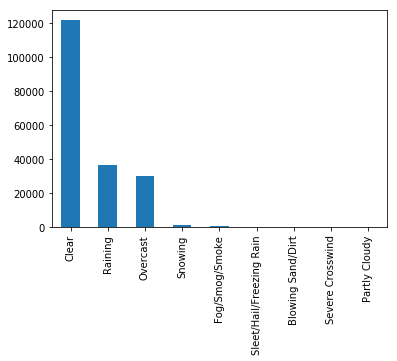

In [25]:
df['WEATHER'].value_counts().plot(kind = 'bar')
plt.show()

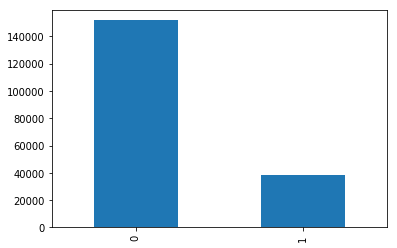

In [26]:
df['WEATHER'].replace(to_replace = ['Clear', 'Overcast', 'Partly Cloudy', 'Raining', \
                                     'Fog/Smog/Smoke','Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Snowing'], \
                                value = [0,0,0,1,1,1, 1,1,1], inplace = True)
df['WEATHER'].value_counts().plot(kind = 'bar')
plt.show()

In [27]:
# y = y -1 // Easiest to classify between 0 and 1
df['SEVERITYCODE'] = df['SEVERITYCODE'] -1

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


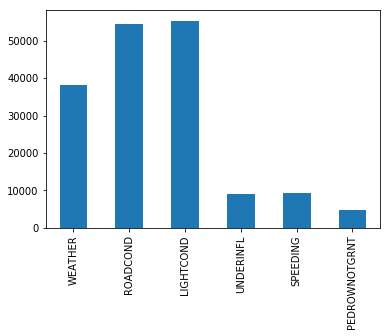

In [28]:
accidents = df[accidentsMotives]
accidents.sum().plot(kind = 'bar')
plt.show()

In [29]:
features

['WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'UNDERINFL',
 'SPEEDING',
 'INATTENTIONIND',
 'ADDRTYPE',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'PEDROWNOTGRNT']

## Address Type

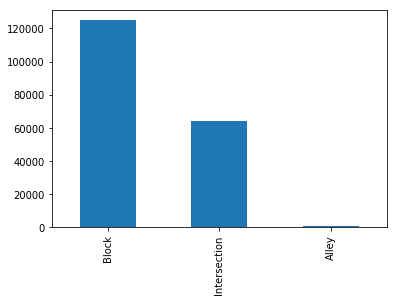

In [30]:
df['ADDRTYPE'].value_counts().plot(kind  = 'bar')
plt.show()

In [31]:
alleydata = df[df['ADDRTYPE'] == 'Alley']
alleydata['SEVERITYCODE'].value_counts()

0    672
1     82
Name: SEVERITYCODE, dtype: int64

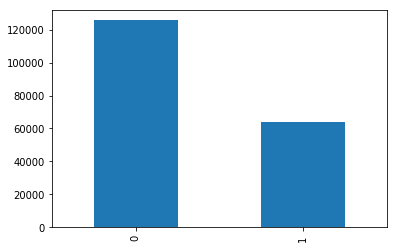

In [32]:
# We will modify the data into: 1 Intersection, 0 No intersection
df['ADDRTYPE'].replace(to_replace = ['Alley', 'Block', 'Intersection'], value = [0,0,1], inplace = True)
df['ADDRTYPE'].value_counts().plot(kind = 'bar')
plt.show()


## Collision Type

In [33]:
df['COLLISIONTYPE'].value_counts()

Parked Car    54781
Angles        39630
Rear Ended    39018
Sideswipe     21250
Left Turn     15635
Pedestrian     7559
Cycles         6183
Right Turn     3394
Head On        2339
Name: COLLISIONTYPE, dtype: int64

In [34]:
def categorical_value_counts(data, catvariable, target):
    columns = data[catvariable].value_counts().keys()
    rows = data[target].value_counts().keys()
    catvaluecounts = pd.DataFrame(index = rows, columns = columns)
    
    for j,y in enumerate(rows):
        val = data[data[target] == y]
        for i,x in enumerate(columns):
            val2 = val[val[catvariable] == x]
            catvaluecounts.iloc[j,i] = val2[catvariable].value_counts().values[0]
    return catvaluecounts

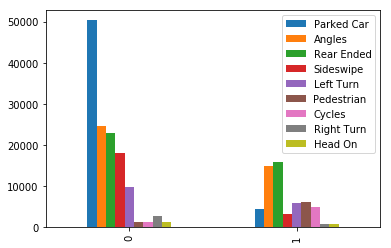

In [35]:
catvaluecounts = categorical_value_counts(df, 'COLLISIONTYPE', 'SEVERITYCODE')
catvaluecounts.plot(kind ='bar')
plt.show()

In [36]:
catvaluecounts

,Parked Car,Angles,Rear Ended,Sideswipe,Left Turn,Pedestrian,Cycles,Right Turn,Head On
0,50340,24738,23075,18071,9721,1378,1238,2679,1390
1,4441,14892,15943,3179,5914,6181,4945,715,949


### Get dummies

In [37]:
df = pd.concat([df, pd.get_dummies(df['COLLISIONTYPE'])], axis =1)
df.drop(['COLLISIONTYPE'], axis = 1, inplace = True)
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SPEEDING,INATTENTIONIND,ADDRTYPE,PERSONCOUNT,PEDCOUNT,...,PEDROWNOTGRNT,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,0,1,0,0,0,0,1,2,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,1,0,0,0,0,1,2,0,...,0,1,0,0,0,0,0,0,0,0


## Pedestrian, Person, Pedcycl and vehicle count

In [57]:
# All this variables are inserted on a numerical (integer) variable. Therefore, there is no need to work with them anymore, as we already
# remove and modified null values.

In [48]:
newfeatures = df.columns[1::]
newfeatures

Index(['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SPEEDING',
       'INATTENTIONIND', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'PEDROWNOTGRNT', 'Angles', 'Cycles', 'Head On', 'Left Turn',
       'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe'],
      dtype='object')

# Balancing Data

In [39]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.7.0)


In [40]:
import sklearn
from imblearn.over_sampling import SMOTE

In [49]:
X_unbalanced = df[newfeatures]
y_unbalanced = df['SEVERITYCODE'].values

In [50]:
X_unbalanced[0:5]

,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SPEEDING,INATTENTIONIND,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,PEDROWNOTGRNT,Angles,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,0,1,0,0,0,0,1,2,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,1,2,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
sum(y_unbalanced)/len(y_unbalanced)

0.30117130076031806

In [52]:
X_bal, y_bal = SMOTE().fit_resample(X_unbalanced, y_unbalanced)

In [53]:
sum(y_bal)/len(y_bal)

0.5

# Normalisation

In [55]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
X_bal = preprocessing.StandardScaler().fit(X_bal).transform(X_bal)

In [56]:
X_bal[0:5]

array([[-0.50178417,  1.58257956, -0.62946818, -0.228796  , -0.22954316,
        -0.43868255,  1.28693918, -0.38103957, -0.24050192, -0.2148477 ,
         0.0856434 , -0.19985411,  1.86945597, -0.22383506, -0.11698165,
        -0.31130926, -0.54401765, -0.25143932, -0.54147412, -0.12886496,
        -0.32566317],
       [ 1.99288868,  1.58257956,  1.58864266, -0.228796  , -0.22954316,
        -0.43868255, -0.7770375 , -0.38103957, -0.24050192, -0.2148477 ,
         0.0856434 , -0.19985411, -0.53491498, -0.22383506, -0.11698165,
        -0.31130926, -0.54401765, -0.25143932, -0.54147412, -0.12886496,
         3.07065734],
       [-0.50178417, -0.63187976, -0.62946818, -0.228796  , -0.22954316,
        -0.43868255, -0.7770375 ,  1.04967917, -0.24050192, -0.2148477 ,
         1.7460563 , -0.19985411, -0.53491498, -0.22383506, -0.11698165,
        -0.31130926,  1.83817564, -0.25143932, -0.54147412, -0.12886496,
        -0.32566317],
       [-0.50178417, -0.63187976, -0.62946818, -0.228796  

# Modelisation:

Machine Learning models chosen:
- **Decision Tree Analysis**: The Decision Tree Analysis breaks down a data set into smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.
- **Logistic Regression**: Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable
- **k-Nearest Neighbor**: K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (based on distance)



In [57]:

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [58]:
# 30% of test dataset and 70% for train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=3)

## Decision Tree Analysis

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[27892  5340]
 [13795 19288]]
0.7065980158457134
0.7114529141219935


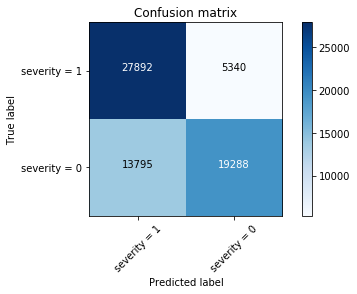

In [95]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree.fit(X_train, y_train) # it shows the default parameters
predTree = Tree.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity = 1','severity = 0'],normalize= False,  title='Confusion matrix')
print(f1_score(y_test,predTree, average = 'weighted'))
print(accuracy_score(y_test,predTree))

In [96]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67     33083
           1       0.67      0.84      0.74     33232

    accuracy                           0.71     66315
   macro avg       0.73      0.71      0.71     66315
weighted avg       0.73      0.71      0.71     66315



## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [90]:
C = [1E-6*10**n for n in range(1,10)]
acc_lr =np.zeros(len(C))
f1_lr =np.zeros(len(C))
loss =np.zeros(len(C))
for i, c in enumerate(C):
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yprob = LR.predict_proba(X_test)
    acc_lr[i] = metrics.accuracy_score(y_test,yhat)
    loss[i] = log_loss(y_test,yprob)
    f1_lr[i] = f1_score(y_test, yhat, average ='weighted')


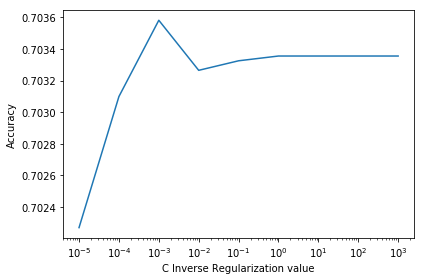

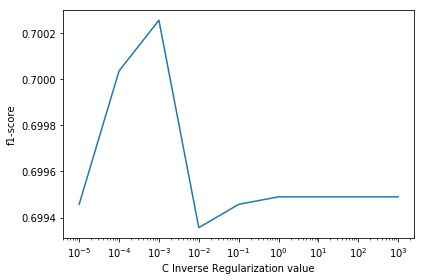

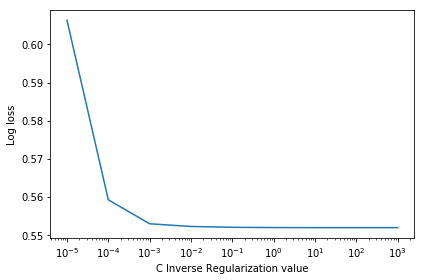

In [91]:
plt.figure(1)
plt.plot(C,acc_lr)
plt.ylabel('Accuracy')
plt.xlabel('C Inverse Regularization value')
plt.xscale('log')
plt.tight_layout()
plt.figure(2)
plt.plot(C,f1_lr)
plt.ylabel('f1-score')
plt.xlabel('C Inverse Regularization value')
plt.xscale('log')
plt.tight_layout()
plt.figure(3)
plt.plot(C,loss)
plt.ylabel('Log loss')
plt.xlabel('C Inverse Regularization value')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [94]:
print( "The best model was for a logloss= ", loss.min(), "with C=", round(C[loss.argmin()]*10000)/10000)
print( "The best model was for a f1-score= ", f1_lr.max(), "with C=", round(C[f1_lr.argmax()]*10000)/10000)
print( "The best model was for a accuracy= ", acc_lr.max(), "with C=", round(C[acc_lr.argmax()]*10000)/10000)

The best model was for a logloss=  0.5518724658698951 with C= 1000.0
The best model was for a f1-score=  0.7002549652715231 with C= 0.001
The best model was for a accuracy=  0.7035813918419663 with C= 0.001


In [83]:
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yprob = LR.predict_proba(X_test)
LR

LogisticRegression(C=0.001, solver='liblinear')

In [86]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67     33083
           1       0.67      0.81      0.73     33232

    accuracy                           0.70     66315
   macro avg       0.71      0.70      0.70     66315
weighted avg       0.71      0.70      0.70     66315



In [101]:
LR.coef_

array([[-0.  , -0.02, -0.05,  0.15,  0.12,  0.05,  0.11,  0.26,  0.75,
         0.62,  0.09,  0.04, -1.97, -1.07, -0.52, -1.33, -2.72, -1.17,
        -1.89, -0.69, -1.72]])

# K-Nearest Neighbor

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
f1_knn = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    f1_knn[n-1] = f1_score(y_test, yhat, average ='weighted')
    


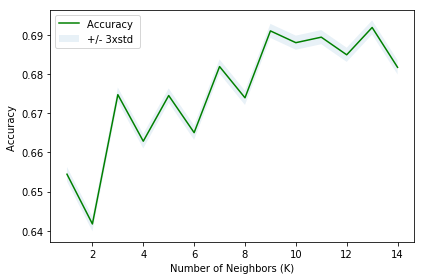

In [71]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

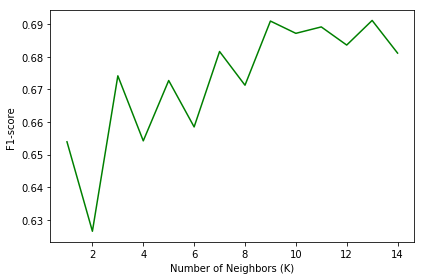

In [72]:
plt.plot(range(1,Ks),f1_knn,'g')
plt.ylabel('F1-score ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [97]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat=neigh.predict(X_test)

In [99]:
print(classification_report(y_test, yhat, digits = 10))

              precision    recall  f1-score   support

           0  0.6905843173 0.6894779796 0.6900307050     33083
           1  0.6913624756 0.6924650939 0.6919133455     33232

    accuracy                      0.6909748926     66315
   macro avg  0.6909733964 0.6909715368 0.6909720252     66315
weighted avg  0.6909742706 0.6909748926 0.6909741402     66315

